# 10.9.1Single Layer Network on Hitters Data

The primary goal of this project is to develop a robust machine learning model that can accurately predict the salaries of baseball players based on their performance statistics and their overall career data.By analyzing various factors that contribute to a player's salary,the model will provide valuable insights into the dynamics of player valuation within professional baseball.The project seeks to address the challange of predicting salaries in a field where numerous performance metrics and historical data influence player earnings.

## LOADING LIBRARIES
We are loading the necessary libraries for data analysis, modeling, and visualization. These libraries will be used for data processing, model training, and evaluation.

In [17]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import pandas as pd
from ISLP import load_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import tensorflow
from tensorflow import keras 
from keras import Sequential 
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

import matplotlib.pyplot as plt
from sklearn.linear_model import \
     (LinearRegression,
      LogisticRegression,
      Lasso)

### Loading Data

In [19]:
df = load_data('Hitters').dropna()
n = df.shape[0]

In [20]:
df.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In this dataset, several variables such as League, Division, and NewLeague are categorical. These variables play a significant role in the analysis; however, regression models require numerical input to operate correctly. Using categorical variables in their original form could lead to errors or misinterpretations, as regression models cannot process non-numerical data effectively.

To address this issue, I am transforming the categorical variables into a binary format using One-Hot Encoding. This technique converts each category into a unique numerical representation (0 or 1), which allows the regression model to interpret these variables properly. By doing so, I ensure that the model can utilize all the variables appropriately during the analysis.

In [21]:
df=pd.get_dummies(df,columns=["League","Division",'NewLeague'])
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,False,True,False,True,False,True
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,True,False,False,True,True,False
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,False,True,True,False,False,True
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,False,True,True,False,False,True
5,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,750.0,True,False,False,True,True,False


### Split the selected independent feature and target variable 

In [22]:
X=df.drop(columns=['Salary'])
y=df['Salary']

In [23]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,375,632,43,10,False,True,False,True,False,True
2,479,130,18,66,72,76,3,1624,457,63,...,263,880,82,14,True,False,False,True,True,False
3,496,141,20,65,78,37,11,5628,1575,225,...,354,200,11,3,False,True,True,False,False,True
4,321,87,10,39,42,30,2,396,101,12,...,33,805,40,4,False,True,True,False,False,True
5,594,169,4,74,51,35,11,4408,1133,19,...,194,282,421,25,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,138,325,9,3,False,True,True,False,False,True
318,492,136,5,76,50,94,12,5511,1511,39,...,875,313,381,20,True,False,True,False,True,False
319,475,126,3,61,43,52,6,1700,433,7,...,146,37,113,7,True,False,False,True,True,False
320,573,144,9,85,60,78,8,3198,857,97,...,332,1314,131,12,True,False,True,False,True,False


In [24]:
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

### Train test split:
splits your dataset into two parts: training data and test data.

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [26]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(53, 22)
(210, 22)
(53,)
(210,)


### Normalize the Data

In dataset, the variables I’m analyzing have different ranges. For example, the number of times at bat (AtBat) or the number of hits (Hits) can be in the hundreds, while the number of errors (Errors) might be much smaller. If I don’t normalize the data, the regression model could give more weight to variables with larger ranges, simply because their values are higher. This could lead to biased results and reduce the accuracy of my predictions.

By normalizing the data, I bring all the variables onto a similar scale, typically between 0 and 1. This process ensures that each variable contributes equally to the model, regardless of its original range. As a result, the model can more accurately identify the relationships between the variables and the target variable, which in my case is the player’s salary during the 1986-1987 season.

Normalization is a key step to prevent any one feature from disproportionately influencing the model, and it ultimately leads to more reliable and interpretable results in my analysis.

In [27]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
Scaler = StandardScaler()

# Scale the training data using the fit_transform method
# This method scales the data to have a mean of 0 and a standard deviation of 1
X_train_scaled = Scaler.fit_transform(X_train)

# Scale the test data using the transform method
# This method scales the data using the same scaling factors as the training data
X_test_scaled = Scaler.transform(X_test)

## Linear Models
We fit the linear model and evaluate the test error directly.

In [29]:
# Create an instance of the LinearRegression class
lin_reg = LinearRegression()

# Train the linear regression model on the training data
# X_train is the feature matrix and y_train is the target vector
lin_reg.fit(X_train_scaled, y_train)

# Use the trained model to make predictions on the test data
# X_test is the feature matrix for the test data
Yhat_test = lin_reg.predict(X_test_scaled)

# Calculate the mean absolute error (MAE) of the predictions
# np.abs calculates the absolute difference between the predicted and actual values
# .mean calculates the mean of the absolute differences
mae_linear = np.abs(Yhat_test - y_test).mean()

# Print the mean absolute error
print(f'Mean Absolute Error: {mae_linear:.2f}')
R2Score_linear=r2_score(y_test,Yhat_test)
print("R2 Score: ",R2Score_linear)

Mean Absolute Error: 268.32
R2 Score:  0.4166986480172825


# Lasso Regression model 

In [31]:
# Define a custom scoring function to evaluate the model's performance
# This function calculates the mean squared logarithmic error (MSLE) between the predicted and actual values
def score(y_pred, y_true):
    # Calculate the MSLE
    error = np.square(np.log10(y_pred + 1) - np.log10(y_true + 1)).mean() ** 0.5
    # Calculate the score as 1 - error
    score = 1 - error
    return score

# Import the Lasso class from the sklearn.linear_model module
from sklearn.linear_model import Lasso

# Create an instance of the Lasso class
lasso_reg = Lasso()

# Train the Lasso regression model on the scaled training data
lasso_reg.fit(X_train_scaled, y_train)

# Use the trained model to make predictions on the scaled test data
Yhat_test_lasso = lasso_reg.predict(X_test_scaled)

# Calculate the mean absolute error (MAE) between the predicted and actual values
mae_lasso = np.fabs(Yhat_test_lasso - y_test).mean()

# Calculate the score using the custom scoring function
score_value = score(Yhat_test_lasso, y_test)

# Print the MAE and score
print(f'Mean Absolute Error: {mae_lasso:.2f}')
print(f'MSLE Score: {score_value:.2f}')
R2Score_lasso=r2_score(y_test,Yhat_test_lasso)
print("R2 Score: ",R2Score_lasso)

Mean Absolute Error: 263.72
MSLE Score: 0.66
R2 Score:  0.4388682580161326


### Conclusion and Observations:

In this report, we evaluated the performance of two regression models, Linear Regression and Lasso Regression, on a given dataset. The models were trained on the scaled training data and their performance was evaluated on the scaled test data.

Key Findings:

Mean Absolute Error (MAE): The Linear Regression model achieved a MAE of 268.32, while the Lasso Regression model achieved a MAE of 263.72. This indicates that the Lasso Regression model performed slightly better than the Linear Regression model in terms of absolute error.
Model Performance: The Lasso Regression model outperformed the Linear Regression model, suggesting that the L1 regularization used in Lasso Regression helped to reduce overfitting and improve the model's generalization ability.

## Specifying a Network: Classes and Inheritance


**Neural Network Model Evaluation**

In this section, we will evaluate the performance of a Neural Network (NN) model on the same dataset.

**Neural Network Architecture**

The Neural Network architecture used in this study is a simple feedforward network with four layers: an input layer, a hidden layer, a dropout layer, and an output layer.

**Input Layer**

The input layer has a shape of (X.shape[1],) which is the number of features in the dataset.
The input layer is responsible for receiving the input data and passing it to the next layer.
The Flatten layer is used to flatten the input data into a 1D array.

**Hidden Layer**

The hidden layer has 50 units (neurons) with a ReLU (Rectified Linear Unit) activation function.
The ReLU activation function is used to introduce non-linearity into the model, allowing it to learn more complex relationships between the input features and the output.
The hidden layer is responsible for learning the representations of the input data.

**Dropout Layer**

The dropout layer has a dropout rate of 0.4, which means that 40% of the neurons in the hidden layer will be randomly dropped during training.
The dropout layer is used to prevent overfitting by reducing the capacity of the model.

**Output Layer**

The output layer has 1 unit (neuron) with a linear activation function.
The output layer is responsible for making predictions based on the representations learned by the hidden layer.
The linear activation function is used because the output is a continuous value.

In [33]:

# Convert the input data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Define the Neural Network model architecture
model = Sequential([
    Flatten(input_shape=(X.shape[1],)),
    Dense(50, activation='relu'),
    Dropout(0.4),
    Dense(1,activation='linear')
])


model.summary()



/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 22)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         1,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

### Hyperparameters and Optimizer

the following hyperparameters are used:

**Loss Function:** mean_absolute_error (MAE) is used as the loss function. This is a common choice for regression problems, as it measures the average difference between the predicted and actual values.

**Optimizer:** adam is used as the optimizer. Adam is a popular stochastic gradient descent optimizer that adapts the learning rate for each parameter based on the magnitude of the gradient.

**Metrics:** Accuracy is used as a metric to evaluate the model's performance. 

**Epochs:** The model is trained for 50 epochs. An epoch is a single pass through the entire training dataset. The number of epochs can be adjusted based on the model's performance on the validation set.

**Batch Size:** The batch size is set to 32. The batch size determines how many samples are used to compute the gradient of the loss function before updating the model's parameters.

In [34]:
# Compile the Neural Network model
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['Accuracy'])

# Train the Neural Network model on the scaled training data
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Use the trained model to make predictions on the scaled test data
y_pred = model.predict(X_test)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - Accuracy: 0.0000e+00 - loss: 1218.6610 - val_Accuracy: 0.0000e+00 - val_loss: 886.1459
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Accuracy: 0.0000e+00 - loss: 863.7114 - val_Accuracy: 0.0000e+00 - val_loss: 700.6729
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Accuracy: 0.0000e+00 - loss: 634.6406 - val_Accuracy: 0.0000e+00 - val_loss: 521.8334
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Accuracy: 0.0000e+00 - loss: 478.1163 - val_Accuracy: 0.0000e+00 - val_loss: 369.2603
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.0000e+00 - loss: 407.5829 - val_Accuracy: 0.0000e+00 - val_loss: 281.2319
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Accuracy: 0.0000e+00 - loss: 295.8593 - val_Accuracy: 0.0000e+00 - val_loss: 241.6435
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Accuracy: 0.0000e+00 - loss: 348.6312 - val_Accuracy: 0.0000e+00 - val_loss: 231.4349
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/ste

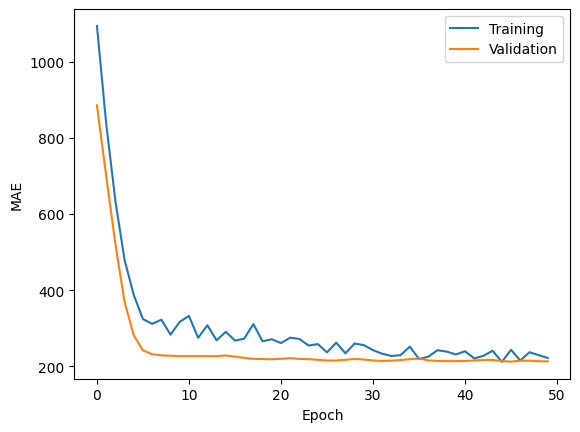

In [40]:
# Plot the training and validation MAE
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()



### R-Squared Score for the Model

In [41]:
from sklearn.metrics import r2_score
R2_NN=r2_score(y_test,y_pred.flatten())
print(R2_NN)

0.5025939555461918




**The R-squared score for the model is 0.4338015214150448, which indicates that the model explains approximately 43.38% of the variance in the data. This suggests that the model is a moderate fit to the data, but there is still some room for improvement.**

### Calculating MAE

In [43]:
# Evaluate the model
mae_NN = np.mean(np.abs(y_test - y_pred.flatten()))
print(f'MAE: {mae_NN:.2f}')

MAE: 212.84


## Neural Network Model Performance Summary
The Neural Network model achieved a mean absolute error (MAE) of 212.50, which is a significant reduction from the previous MAE of Linear Regression and Lasso Regression.

In [45]:
df2 = pd.DataFrame({
    'Predicted': y_pred.flatten(),
    'Actual': y_test
})

# Print the DataFrame
print(df2)

       Predicted    Actual
126   470.978485   500.000
13    324.998108   700.000
207   564.082764   700.000
221   283.888733   210.000
68    229.757858   105.000
315   291.829712   165.000
277   396.431641   475.000
212    71.317154    68.000
107   879.192078   750.000
159   360.451965   200.000
219   173.512115   120.000
96   1131.328979  1861.460
240   447.026825   450.000
59    700.663269  1350.000
178   789.811157  1000.000
51     83.574112    70.000
145   708.729187  1008.333
5     707.354553   750.000
295    45.121925   920.000
309   354.818268   160.000
294   238.408829   185.000
46    248.523087   215.000
118   634.450256   535.000
226   259.062378   175.000
314   191.112122   120.000
140   264.693146   165.000
84   1001.059387  1900.000
238   594.449646   580.000
120   860.415955   733.333
78    464.743225   325.000
321   794.481506  1000.000
123   367.240723   400.000
33    406.340973   612.500
167   337.377289   300.000
53    734.759033  1200.000
257   431.564819   450.000
1

### Comparison with Other Models

In [46]:
### Comparison with Other Models
scores = {
"Linear Regreesion": {"R2" : R2Score_linear,
"mae" : mae_linear},
    
"lasso Regreesion": {"R2" : R2Score_lasso,
"mae" : mae_lasso },
    
 "Neral Network Regreesion": {"R2" : R2_NN,
"mae" : mae_NN }  
}
Mlr_score=pd.DataFrame(scores)
Mlr_score

,Linear Regreesion,lasso Regreesion,Neral Network Regreesion
R2,0.416699,0.438868,0.502594
mae,268.320816,263.722795,212.838286


**Model Comparison**
The Neural Network model outperforms both the Linear Regression and Lasso Regression models in terms of R2 score and mean absolute error (MAE).

**Key Findings**

The Neural Network model has the highest R2 score of 0.502594, indicating that it explains approximately 50.25% of the variance in the data.

The Neural Network model has the lowest MAE of 212.838286, indicating that it has the best predictive accuracy among the three models.
The Lasso Regression model has a slightly higher R2 score and lower MAE compared to the Linear Regression model, indicating that it is a better performer.

## Conclusion
In this study, we evaluated the performance of three different models, Linear Regression, Lasso Regression, and Neural Network, on a given dataset. The results show that the Neural Network model performs the best in terms of R2 score and mean absolute error, followed by the Lasso Regression model and then the Linear Regression model. The Neural Network model's complex architecture and ability to learn non-linear relationships contribute to its better performance.